<a href="https://colab.research.google.com/github/monteiro-fernando/Data_Science/blob/main/Analisando_os_Dados_do_Airbnb_(Bangkok).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Sigmoidal logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Bangkok*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Airbnb" width="30%" src="https://raw.githubusercontent.com/monteiro-fernando/Data_Science/main/img/Airbnb_Logo.png"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Bangkok na Tailândia, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Bangkok, "A Cidade dos Anjos"
<center><img alt="Bangkok" width="100%" src="https://raw.githubusercontent.com/monteiro-fernando/Data_Science/main/img/Bangkok.jpg"></center>

A escolha pela cidade de Bangkok para fazer esta análise se deu, primeiramente, porque farei uma viagem para lá em novembro (se tudo der certo..rs), e também por se tratar de uma das cidades mais visitadas do mundo, segundo a [Forbes](https://www.forbes.com/sites/alexandratalty/2018/09/25/bangkok-is-named-most-visited-city-in-the-world-again/?sh=167b0f584071).

Bangkok é a capital da Tailândia, sendo mundialmente conhecida pela enorme quantidade de templos (mais de 400), pela circulação frenética de pessoas, carros, motos e por seus famosos ["Tuk-Tuks"](https://forevervacation.com/the-vacationer/everything-you-need-to-know-about-tuk-tuks-in-bangkok).

A moeda utilizada na Tailândia é o *Baht*, sendo que **1 *Baht* equivale a aproximadamente 18 centavos** (cotação referente à 05/02/21).

A melhor época para visita acontece entre os meses de novembro a fevereiro, quando o clima fica mais ameno e com uma menor ocorrência de chuvas.




**Agora que já tivemos uma breve introdução sobre o destino, mãos à obra!**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será utilizado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Bangkok (good for visualisations).*


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/thailand/central-thailand/bangkok/2020-12-23/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de identificação do imóvel
* `name` - nome do anúncio da propriedade
* `host_id` - número de identificação do proprietário (anfitrião) do imóvel
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - tipo de quarto oferecido
* `price` - preço da diária do imóvel (em Baht - moeda tailandesa)
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, visualizando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,27934,Nice room with superb city view,120437,Nuttee,NaN,Ratchathewi,13.76000,100.54269,Entire home/apt,1660,3,65,2020-01-06,0.61,2,362
1,27942,Town House (1) bedroom available,120462,Donald,NaN,Bangkok Yai,13.73463,100.47540,Private room,906,1,0,NaN,NaN,1,0
2,27979,"Easy going landlord,easy place",120541,Emy,NaN,Bang Na,13.66746,100.61540,Private room,1148,1,0,NaN,NaN,2,358
3,28354,Place near Metro and Shopping Mall ( Monthly o...,121848,Jaruwan,NaN,Chatu Chak,13.80970,100.56527,Entire home/apt,1057,28,52,2019-12-09,0.41,1,364
4,28745,modern-style apartment in Bangkok,123784,Familyroom,NaN,Bang Kapi,13.75379,100.62422,Private room,800,60,0,NaN,NaN,1,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
Essa etapa é importante para verificarmos a quantidade de entradas (linhas) e variáveis (colunas) de nosso *dataset*, e também se os dados encontram-se dentro dos formatos esperados (int64, float, object, etc).

No caso específico deste *dataset* não foi necessário fazer alterações no formatos dos dados, logo seguimos com a nossa análise.

In [4]:
# identificar o volume de dados do dataset
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

Dimensões do Dataset 
Variáveis:  16 
Entradas:  19709


In [5]:
# verificar os tipos das variáveis do dataset
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Uma das primeiras etapas para verificarmos a qualidade dos dados em análise é checar a quantidade de valores nulos/ausentes em nosso *dataset*.

Com apenas uma linha de código, foi possível verificar que:

* A coluna `neighbourhood_group` possui 100% dos seus valores faltantes; 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em aproximadamente 41% das linhas;
* As variáveis `name` e `host_name` têm menos que 1% dos valores nulos.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100

neighbourhood_group               100.000000
reviews_per_month                  41.174083
last_review                        41.174083
name                                0.050738
host_name                           0.010148
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

Tendo em vista que a **coluna** `neighbourhood_group` possuí 100% dos dados faltantes, e que as **colunas** `reviews_per_month` e `last_review` não fazem parte do escopo desta análise, optamos por excluí-las.

Com relação às **entradas** faltantes nas colunas `name` e `host_name`, tendo em vista que representam um número inferior a 1% dos dados, também optamos por excluí-las.

In [7]:
# excluir colunas com dados faltantes
df.drop(columns=['neighbourhood_group', 'reviews_per_month', 'last_review'], inplace=True)

# excluir entradas com dados faltantes
df.dropna(axis=0, inplace=True)

Após a limpeza, vamos conferir os resultados.

In [8]:
#verificar a quantidade de dados faltantes
print('Coluna\t\t\t Dados Faltantes')
(df.isnull().sum()).sort_values(ascending=False)

Coluna			 Dados Faltantes


availability_365                  0
calculated_host_listings_count    0
number_of_reviews                 0
minimum_nights                    0
price                             0
room_type                         0
longitude                         0
latitude                          0
neighbourhood                     0
host_name                         0
host_id                           0
name                              0
id                                0
dtype: int64

In [9]:
# verificar as novas dimensões do dataset
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

Dimensões do Dataset 
Variáveis:  13 
Entradas:  19697


### **Q3. Qual o tipo de distribuição das variáveis?** 

Para visualizar a distribuição das variáveis, vamos plotar seus respectivos histogramas.

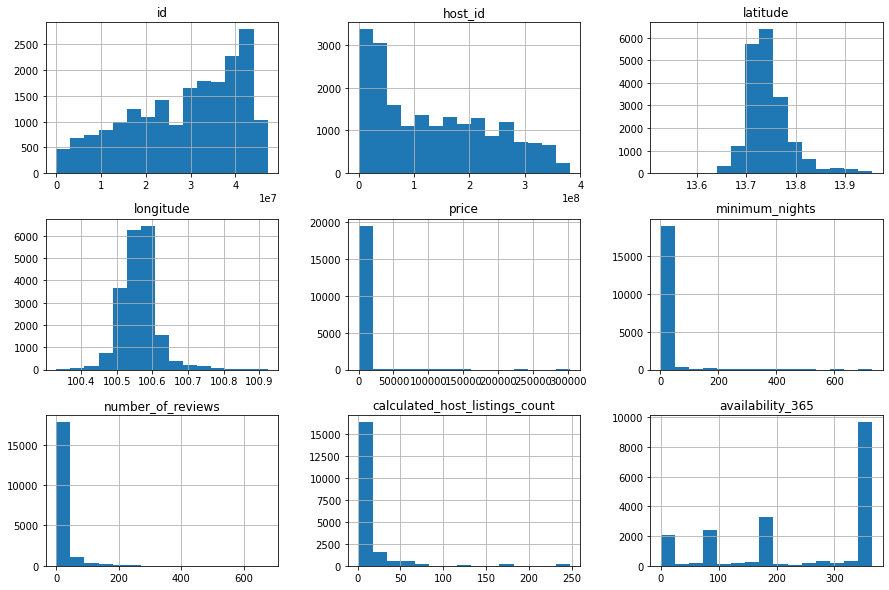

In [10]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**
Após a visualização dos histogramas, foi possível verificar indícios da presença de *outliers*. 

Vamos focar na variável `price`; logo de cara verifica-se que os valores não seguem uma distribuição, o que acaba distorcendo a representação gráfica.

Para confirmar nossa hipótese vamos verificar o resumo estatístico através do método `describe()` e em seguida vamos plotar um `boxplot` para a variável `price`.

In [11]:
# ver o resumo estatístico da variável price
df.price.describe().round(1)

count     19697.0
mean       2078.3
std        6260.1
min           0.0
25%         705.0
50%        1100.0
75%        1900.0
max      302105.0
Name: price, dtype: float64

Com o auxílio do resumo estatístico foi possível verificar o seguinte:
- A variável `price` possui 75% de seus valores abaixo de 1900, no entanto seu valor máximo é 302105 (valor extremamente alto);
- O valor mínimo da variável `price` é 0 (zero). Será que existem acomodações gratuitas em Bangkok? Ou temos algum problema em nosso *DataFrame*?


#### Tratando Outliers

<p align="center"><img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png
", width="50%"></p>


*Outliers* são pontos discrepantes, que estão destoando do padrão do conjunto de dados.

É muito importante conseguir identificar e tratar esses *outliers*, pois eles podem nos mostrar uma imagem incorreta dos nossos dados.

Podemos identificar um *outlier* de diversas formas, entre elas podemos citar:

* IQR Score
* Boxplots
* Scatter plots
* Z-Score

Em nossa análise utilizaremos o **IQR Score**.

O IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%).

<p align=center><b>IQR = Q3 - Q1


Para tratar os *outliers* da variável `price` seguiremos os seguintes passos:

* Definir o Q1 e Q3;
* Calcular seu IQR;
* Definir o limite superior e inferior para cortar os outliers;
* Remover os outliers.

In [12]:
# definir Q1 e Q3
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)

# calcular o IQR
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definir os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:  1195.0
Limite superior de price:  3692.5
Limite inferior de price:  -1087.5


Apesar de não termos outliers na parte inferior, continuamos tendo valores iguais a zero, que precisam ser tratados.


#### Boxplot para a variável `price` (antes da remoção de *outliers*)

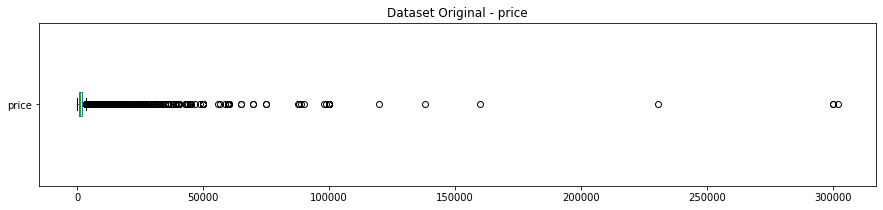

O dataset possui 19697 linhas

price: valores acima de 3692.5
1710 entradas
8.6815%

price: valores iguais a 0 (zero)
1 entradas
0.0051%


In [13]:
# boxplot para price
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()

# verificar o número de entradas do dataset
print("O dataset possui {} linhas".format(df.shape[0]))

# verificar a quantidade de valores acima do limite superior para price
print("\nprice: valores acima de 3692.5")
print("{} entradas".format(len(df[df.price > 3692.5])))
print("{:.4f}%".format((len(df[df.price > 3692.5]) / df.shape[0])*100))

# verificar a quantidade de valores iguais a 0 (zero) para price
print("\nprice: valores iguais a 0 (zero)")
print("{} entradas".format(len(df[df.price == 0])))
print("{:.4f}%".format((len(df[df.price == 0]) / df.shape[0])*100))

#### Boxplot para a variável `price` (após a remoção de *outliers*)
Agora vamos "limpar" nosso *DataFrame*, removendo os outliers anteriormente identificados, bem como a entrada com o valor de diária igual a 0 (zero); e na sequência vamos plotar um novo *boxplot* para a variável `price`.

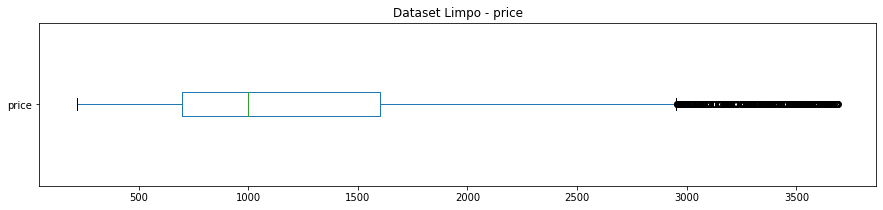

Tamanho original: 19697 linhas
Tamanho atual: 17986 linhas


In [14]:
# remover os outliers e a entrada com valor igual a zero em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 3692.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0].index, axis=0, inplace=True)

# plotar o histograma para a variável price
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()
print("Tamanho original: {} linhas".format(df.shape[0]))
print("Tamanho atual: {} linhas".format(df_clean.shape[0]))

Aqui podemos visualizar o resultado de nossa limpeza nos dados.

Apesar de ainda constarem dados apontados como *outliers* no *boxplot*, devemos lembrar que estes dados se referem à nova configuração do *dataset*; e nossa limpeza levou em consideração os quartis dos dados originais.

Agora vamos plotar um novo histograma da variável `price` para visualizar sua nova distribuição.

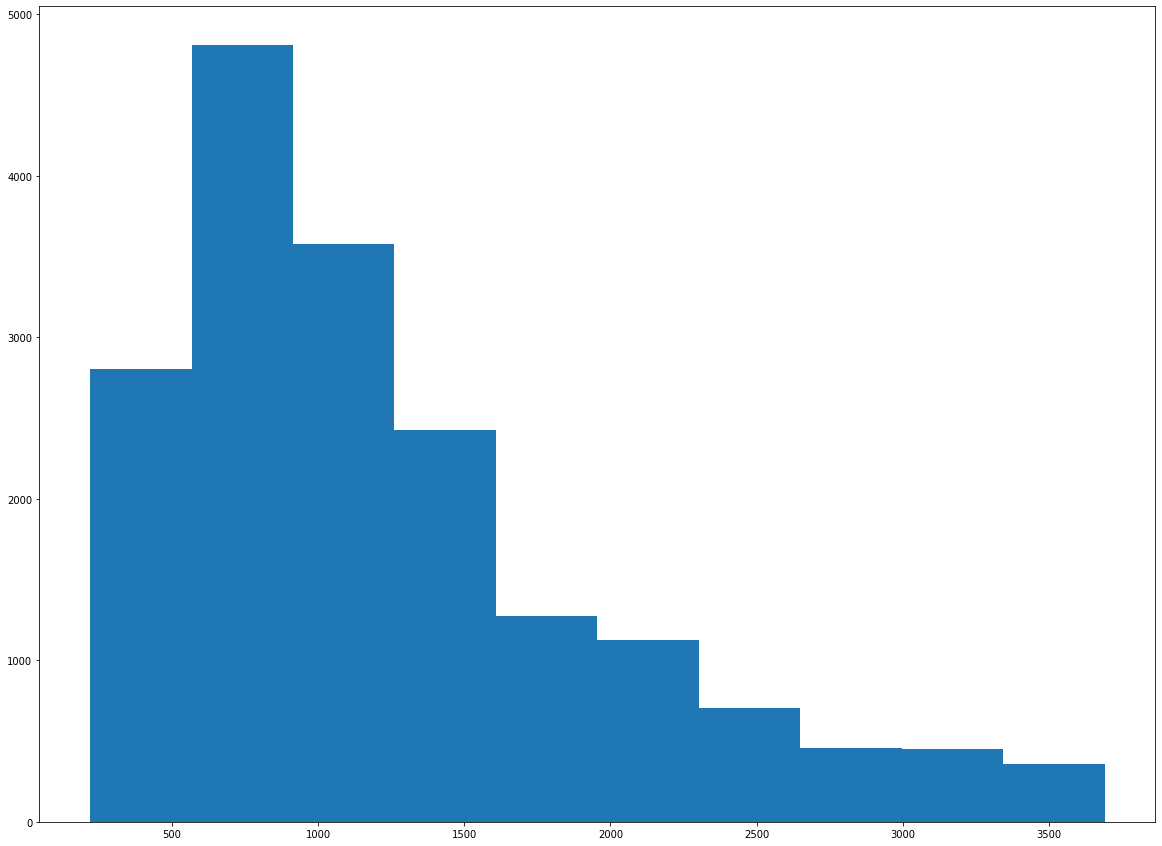

In [15]:
# verificar o histograma da variável price (sem outliers)
df_clean.price.hist(figsize=(20,15), grid=False);

In [16]:
# verificar a distribuição estatística dos dados limpos
df_clean.price.describe().round(1)

count    17986.0
mean      1249.9
std        750.4
min        220.0
25%        699.0
50%       1000.0
75%       1600.0
max       3690.0
Name: price, dtype: float64

### **Q5. Qual a média dos preços de aluguel?**
Agora vamos comparar a diferença entre a média dos preços de aluguel antes e após a remoção dos *outliers*.

In [17]:
# ver a média da coluna price com outliers
print("Preço médio do aluguel (com outliers):\t {}".format(round(df.price.mean(),2)))

# ver a média da coluna price sem outliers
print("Preço médio do aluguel (sem outliers):\t {}".format(round(df_clean.price.mean(),2)))

Preço médio do aluguel (com outliers):	 2078.32
Preço médio do aluguel (sem outliers):	 1249.9


Agora temos uma distribuição mais "realista" dos preços, cabendo destaque ao seguinte ponto:
- A média do valor da diária foi reduzida drasticamente, caindo de 2078.3 Baht (374 reais) para 1249.9 Baht (69 reais), o que demonstra quão sensível este atributo é em relação a presença de *outliers*.

### **Q6. Qual a correlação existente entre as variáveis**
Para identificar as correlações (relação ou semelhança entre duas coias) existentes entre as variáveis de interesse, vamos fazer o seguinte:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [18]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,-0.034118,-0.021646,-0.086361,-0.006402
minimum_nights,-0.034118,1.000000,-0.039943,0.092691,0.046806
number_of_reviews,-0.021646,-0.039943,1.000000,-0.031265,0.010741
calculated_host_listings_count,-0.086361,0.092691,-0.031265,1.000000,0.022390
availability_365,-0.006402,0.046806,0.010741,0.022390,1.000000


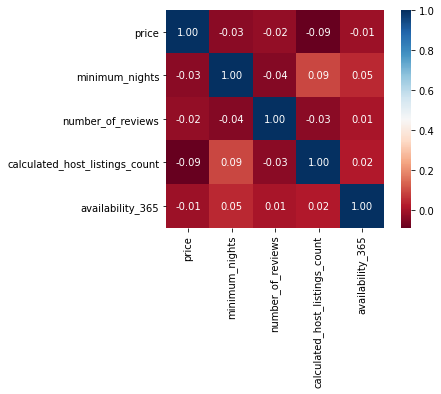

In [19]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

Após a análise do *heatmap* verificamos que nenhuma das variáveis possuí uma correlação que possa ser considerada forte.

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**
Dentro do Airbnb é possível alugar diversos tipos de imóveis, como por exemplo: casas inteiras, apartamentos, quartos individuais ou compartilhados, entre outros.

Para verificar o número de ocorrências de cada tipo de imóvel vamos utilizar o método `value_counts()`.

In [20]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    9906
Private room       6478
Hotel room          907
Shared room         695
Name: room_type, dtype: int64

In [21]:
# mostrar a porcentagem de cada tipo de imóvel disponível
round(((df_clean.room_type.value_counts() / df_clean.shape[0])*100), 2)

Entire home/apt    55.08
Private room       36.02
Hotel room          5.04
Shared room         3.86
Name: room_type, dtype: float64

No caso de Bangkok vemos que a maioria dos imóveis disponíveis são casas/apartamentos inteiros (55%), seguidos por quartos individuais (36%).

### **Q8. Qual a localidade mais cara em Bangkok?**
Para verificarmos o preço médio (`price`) em função dos bairros (`neighbourhood`) vamos utilizar a função `groupby()`.

Mas, primeiramente, vamos verificar quantos imóveis estão disponíveis em cada bairro utilizando o método `value_counts()`.

<center><img alt="Pathum Wan District" width="100%" src="https://raw.githubusercontent.com/monteiro-fernando/Data_Science/main/img/Pathum%20Wan%20District.jpg"></center>

<center>Distrito de Pathum Wan - Bangkok

In [22]:
# ver a quantidade de imóveis disponíveis por bairro
print("Bairros:\t N° de imóveis disponíveis:\n")
df_clean.neighbourhood.value_counts()

Bairros:	 N° de imóveis disponíveis:



Vadhana                 2224
Khlong Toei             2182
Huai Khwang             1439
Ratchathewi             1314
Bang Rak                 955
Sathon                   829
Phra Nakhon              762
Phra Khanong             660
Chatu Chak               594
Din Daeng                553
Bang Na                  548
Phaya Thai               504
Parthum Wan              500
Khlong San               470
Suanluang                442
Bang Kapi                310
Bang Sue                 270
Thon buri                256
Lat Krabang              244
Bang Phlat               232
Don Mueang               206
Yan na wa                205
Phasi Charoen            173
Pra Wet                  169
Wang Thong Lang          151
Bangkok Noi              150
Lak Si                   150
Pom Prap Sattru Phai     147
Bang Khen                145
Bang Kho laen            140
Samphanthawong           122
Dusit                    107
Bang Khae                 96
Bangkok Yai               91
Chom Thong    

Como podemos verificar, existem bairros com mais de 2 mil imóveis disponíveis, e bairros com números inferiores a 50 imóveis disponíveis, o que pode gerar comparações injustas entre as médias de preço. Em nossa análise vamos considerar apenas os bairros que possuam um número maior que 200 imóveis disponíveis para locação.

In [29]:
# ver o top 10 bairros mais caros, na média
df_clean2 = df_clean.groupby(['neighbourhood']).filter(lambda x: len(x) > 200)
print("Top 10: aluguéis mais caros em Bangkok\n")
round(df_clean2.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10], 2)

Top 10: aluguéis mais caros em Bangkok



neighbourhood
Parthum Wan    1732.05
Yan na wa      1466.96
Bang Rak       1462.12
Vadhana        1446.32
Ratchathewi    1373.91
Khlong San     1352.45
Phaya Thai     1294.96
Khlong Toei    1244.53
Chatu Chak     1220.21
Sathon         1176.09
Name: price, dtype: float64

In [31]:
# ver o top 10 bairros mais baratos, na média
df_clean2 = df_clean.groupby(['neighbourhood']).filter(lambda x: len(x) > 200)
print("Top 10: aluguéis mais baratos em Bangkok\n")
round(df_clean2.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)[:10], 2)

Top 10: aluguéis mais baratos em Bangkok



neighbourhood
Bang Sue         934.43
Bang Na          983.04
Don Mueang       991.35
Bang Phlat       997.63
Bang Kapi       1004.38
Phra Khanong    1096.26
Din Daeng       1096.34
Thon buri       1115.60
Lat Krabang     1116.07
Suanluang       1130.46
Name: price, dtype: float64

Como são fornecidas as Latitudes e Longitudes para os imóveis, também é possível plotar um "mapa", onde cada ponto representa um imóvel, e cada cor representa seu respectivo preço. Para isso, considera-se `x=longitude` e `y=latitude`.

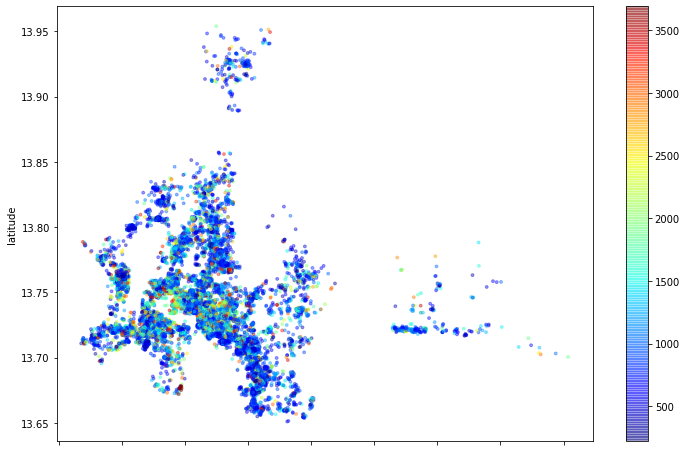

In [24]:
# plotar os imóveis pela latitude-longitude
df_clean2.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
        c=df_clean2['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões
Nesta análise superficial na base de dados do Airbnb referente à cidade de Bangkok na Tailândia, foi possível aplicar alguns conceitos básicos de *Data Science* como: importação e manipulação de dados, visualização de gráficos e a obtenção de *insights* a partir da utilização de métodos e funções da linguagem de programação **Python**.

Foi possível identificar e eliminar os *outliers* da variável `price`, obtendo um preço médio mais "realista".

Também foi possível verificar a quantidade de imóveis disponíveis em cada bairro, as maiores e as menores médias de preço do aluguel, e ainda geramos um mapa para facilitar a visualização da localização e dos preços dos imóveis disponíveis.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Em uma próxima análise exploratória, recomenda-se a utilização do conjunto de dados completos, com 106 atributos disponíveis. 